In [44]:
import pandas as pd
df = pd.read_csv('output.csv')



In [45]:
dff=df
dff=dff.fillna(0)
dff

,SrcAddr,Sport,DstAddr,Dport,DstLoad,SrcPkts,SrcBytes,DstLoss,DstBytes,sMeanPktSz,SrcLoad,dMeanPktSz,Rate
0,192.168.1.1,0,192.168.1.92,0,0.000000,4,168,0,0,42.000000,238.887512,0.000000,0.710975
1,192.168.1.11,mdns,224.0.0.251,mdns,0.000000,1,168,0,0,168.000000,0.000000,0.000000,0.000000
2,192.168.1.129,52631,216.58.215.238,https,2457.913086,6,2047,0,807,341.166656,5930.975586,100.875000,5.649376
3,192.168.1.129,48496,216.58.215.238,https,7390.489746,18,4338,0,4803,241.000000,6697.375977,282.529419,6.947485
4,192.168.1.97,mdns,224.0.0.251,mdns,0.000000,2,170,0,0,85.000000,664.848145,0.000000,0.977718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,192.168.1.129,50112,157.240.203.14,https,99528.406250,34,4271,0,29523,125.617645,14400.446289,868.323547,29.089178
352,192.168.1.1,0,192.168.1.129,0,0.000000,1,42,0,42,42.000000,0.000000,42.000000,66666.671875
353,192.168.1.108,mdns,224.0.0.251,mdns,0.000000,2,266,0,0,133.000000,518.620667,0.000000,0.487425
354,fe80::a8a7:11e2:152c:b15f,mdns,ff02::fb,mdns,0.000000,2,306,0,0,153.000000,596.609009,0.000000,0.487426


In [46]:
dff['ct_dst_sport_ltm'] = dff.groupby(['DstAddr', 'Sport'])['SrcAddr'].transform('nunique')
min_time = dff['ct_dst_sport_ltm'].min()
max_time = dff['ct_dst_sport_ltm'].max()

print("Minimum :", min_time)
print("Maximum :", max_time)
dff['ct_dst_sport_ltm']

Minimum : 1
Maximum : 5


0      2
1      5
2      1
3      1
4      5
      ..
351    1
352    1
353    5
354    3
355    1
Name: ct_dst_sport_ltm, Length: 356, dtype: int64

In [48]:
desired_columns = ['ct_dst_sport_ltm', 'DstLoad', 'SrcPkts', 'SrcBytes', 'DstLoss', 'DstBytes', 'sMeanPktSz', 'SrcLoad', 'dMeanPktSz', 'Rate','SrcAddr'	,'Sport','DstAddr',	'Dport']
dff = dff.reindex(columns=desired_columns)
dff


,ct_dst_sport_ltm,DstLoad,SrcPkts,SrcBytes,DstLoss,DstBytes,sMeanPktSz,SrcLoad,dMeanPktSz,Rate,SrcAddr,Sport,DstAddr,Dport
0,2,0.000000,4,168,0,0,42.000000,238.887512,0.000000,0.710975,192.168.1.1,0,192.168.1.92,0
1,5,0.000000,1,168,0,0,168.000000,0.000000,0.000000,0.000000,192.168.1.11,mdns,224.0.0.251,mdns
2,1,2457.913086,6,2047,0,807,341.166656,5930.975586,100.875000,5.649376,192.168.1.129,52631,216.58.215.238,https
3,1,7390.489746,18,4338,0,4803,241.000000,6697.375977,282.529419,6.947485,192.168.1.129,48496,216.58.215.238,https
4,5,0.000000,2,170,0,0,85.000000,664.848145,0.000000,0.977718,192.168.1.97,mdns,224.0.0.251,mdns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1,99528.406250,34,4271,0,29523,125.617645,14400.446289,868.323547,29.089178,192.168.1.129,50112,157.240.203.14,https
352,1,0.000000,1,42,0,42,42.000000,0.000000,42.000000,66666.671875,192.168.1.1,0,192.168.1.129,0
353,5,0.000000,2,266,0,0,133.000000,518.620667,0.000000,0.487425,192.168.1.108,mdns,224.0.0.251,mdns
354,3,0.000000,2,306,0,0,153.000000,596.609009,0.000000,0.487426,fe80::a8a7:11e2:152c:b15f,mdns,ff02::fb,mdns


In [51]:
dfff=dff[['ct_dst_sport_ltm', 'DstLoad', 'SrcPkts', 'SrcBytes', 'DstLoss', 'DstBytes', 'sMeanPktSz', 'SrcLoad', 'dMeanPktSz', 'Rate']]
column_mapping = {
    'DstLoad': 'dload',
    'SrcPkts': 'spkts',
    'SrcBytes': 'sbytes',
    'DstLoss': 'dloss',
    'DstBytes': 'dbytes',
    'sMeanPktSz': 'smean',
    'SrcLoad': 'sload',
    'dMeanPktSz': 'dmean',
    'Rate': 'rate'
}

dfff.rename(columns=column_mapping, inplace=True)
dfff


,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate
0,2,0.000000,4,168,0,0,42.000000,238.887512,0.000000,0.710975
1,5,0.000000,1,168,0,0,168.000000,0.000000,0.000000,0.000000
2,1,2457.913086,6,2047,0,807,341.166656,5930.975586,100.875000,5.649376
3,1,7390.489746,18,4338,0,4803,241.000000,6697.375977,282.529419,6.947485
4,5,0.000000,2,170,0,0,85.000000,664.848145,0.000000,0.977718
...,...,...,...,...,...,...,...,...,...,...
351,1,99528.406250,34,4271,0,29523,125.617645,14400.446289,868.323547,29.089178
352,1,0.000000,1,42,0,42,42.000000,0.000000,42.000000,66666.671875
353,5,0.000000,2,266,0,0,133.000000,518.620667,0.000000,0.487425
354,3,0.000000,2,306,0,0,153.000000,596.609009,0.000000,0.487426


In [59]:
from pycaret.classification import *
# load model
loaded = load_model('my_first_model')
loaded

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ct_dst_sport_ltm', 'dload',
                                             'spkts', 'sbytes', 'dloss',
                                             'dbytes', 'smean', 'sload',
                                             'dmean', 'rate'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categorical_imput...
                                                              fill_v

In [53]:
from pycaret.classification import *
unseen_predictions = predict_model(loaded, data=dfff)
unseen_predictions.head()

,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate,prediction_label,prediction_score
0,2,0.000000,4,168,0,0,42.000000,238.887512,0.000000,0.710975,0,1.0
1,5,0.000000,1,168,0,0,168.000000,0.000000,0.000000,0.000000,1,1.0
2,1,2457.913086,6,2047,0,807,341.166656,5930.975586,100.875000,5.649376,0,1.0
3,1,7390.489746,18,4338,0,4803,241.000000,6697.375977,282.529419,6.947485,1,1.0
4,5,0.000000,2,170,0,0,85.000000,664.848145,0.000000,0.977718,1,1.0


In [55]:
import pandas as pd
import pandas as pd
db = pd.read_csv('db.csv')

# Extract the desired columns from df
columns = ['ct_dst_sport_ltm', 'dload', 'spkts', 'sbytes', 'dloss', 'dbytes', 'smean', 'sload', 'dmean', 'rate']
new_df = db[db['label'] == 1][columns].copy()


In [56]:
new_df

,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate
243,1,0.0000,20,1280,0,0,64,1.055112e+04,0,20.607666
244,1,0.0000,20,1280,0,0,64,1.055112e+04,0,20.607666
245,1,0.0000,20,1280,0,0,64,1.055112e+04,0,20.607666
246,1,0.0000,20,1280,0,0,64,1.055112e+04,0,20.607666
247,1,0.0000,2,104,0,0,52,4.622222e+07,0,111111.110000
...,...,...,...,...,...,...,...,...,...,...
65847,1,0.0000,2,1510,0,0,755,5.033333e+08,0,83333.330000
65848,1,0.0000,4,1216,0,0,304,3.551590e+02,0,0.146036
65849,1,0.0000,4,1216,0,0,304,3.551590e+02,0,0.146036
65850,1,2857.9539,10,590,1,268,59,6.774882e+03,45,23.922606


In [60]:
from pycaret.classification import *
# load model
loaded = load_model('my_best_pipeline')
unseen_predictions = predict_model(loaded, data=new_df)
unseen_predictions.head()

Transformation Pipeline and Model Successfully Loaded


,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate,prediction_label,prediction_score
243,1,0.0,20,1280,0,0,64,1.055112e+04,0,20.607666,1,0.9922
244,1,0.0,20,1280,0,0,64,1.055112e+04,0,20.607666,1,0.9922
245,1,0.0,20,1280,0,0,64,1.055112e+04,0,20.607666,1,0.9922
246,1,0.0,20,1280,0,0,64,1.055112e+04,0,20.607666,1,0.9922
247,1,0.0,2,104,0,0,52,4.622222e+07,0,111111.109375,0,0.9180


In [1]:
from pycaret.classification import *


In [10]:
import pandas as pd
df = pd.read_csv('db.csv')
columns = ['ct_dst_sport_ltm', 'dload', 'spkts', 'sbytes', 'dloss', 'dbytes', 'smean', 'sload', 'dmean', 'rate','label']
df = df[columns]
df

,ct_dst_sport_ltm,dload,spkts,sbytes,dloss,dbytes,smean,sload,dmean,rate,label
0,1,0.0000,2,496,0,0,248,180363630.0,0,90909.090000,0
1,1,0.0000,2,1762,0,0,881,881000000.0,0,125000.000000,0
2,1,0.0000,2,1068,0,0,534,854400000.0,0,200000.000000,0
3,1,0.0000,2,900,0,0,450,600000000.0,0,166666.660000,0
4,1,0.0000,2,2126,0,0,1063,850400000.0,0,100000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
82327,1,0.0000,2,104,0,0,52,83200000.0,0,200000.000000,0
82328,1,2242.1099,20,18062,1,354,903,124104.4,44,24.410067,0
82329,1,0.0000,1,46,0,0,46,0.0,0,0.000000,0
82330,1,0.0000,1,46,0,0,46,0.0,0,0.000000,0


In [11]:
s = setup(data = df, target = 'label', session_id=123) 


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(82332, 11)"
4,Transformed data shape,"(82332, 11)"
5,Transformed train set shape,"(57632, 11)"
6,Transformed test set shape,"(24700, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9363,0.9865,0.9226,0.9602,0.9410,0.8719,0.8727,0.5810
catboost,CatBoost Classifier,0.9358,0.9865,0.9220,0.9599,0.9406,0.8709,0.8718,6.3100
lightgbm,Light Gradient Boosting Machine,0.9331,0.9852,0.9137,0.9629,0.9377,0.8656,0.8670,0.1370
rf,Random Forest Classifier,0.9318,0.9833,0.9293,0.9460,0.9375,0.8625,0.8627,0.5430
et,Extra Trees Classifier,0.9296,0.9779,0.9280,0.9433,0.9356,0.8580,0.8582,0.3200
dt,Decision Tree Classifier,0.9220,0.9251,0.9232,0.9344,0.9287,0.8426,0.8427,0.0570
gbc,Gradient Boosting Classifier,0.9108,0.9751,0.8859,0.9488,0.9162,0.8211,0.8233,0.8910
knn,K Neighbors Classifier,0.8994,0.9592,0.8910,0.9236,0.9070,0.7975,0.7981,0.2440
ada,Ada Boost Classifier,0.8653,0.9497,0.8339,0.9143,0.8720,0.7305,0.7343,0.2580
ridge,Ridge Classifier,0.7600,0.0000,0.6838,0.8510,0.7583,0.5254,0.5379,0.0250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

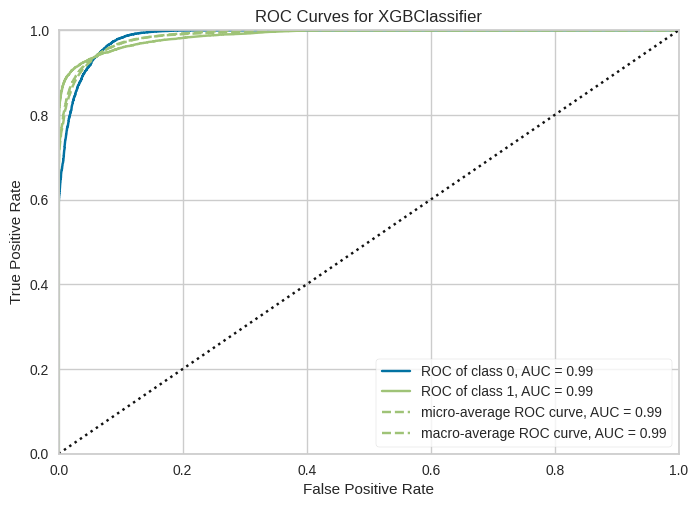

In [19]:
plot_model(best, plot = 'auc')


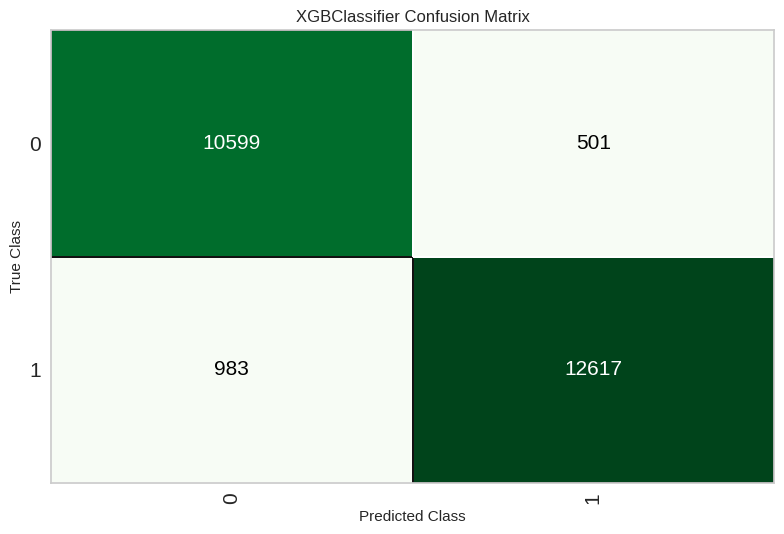

In [20]:
# functional API
plot_model(best, plot = 'confusion_matrix')

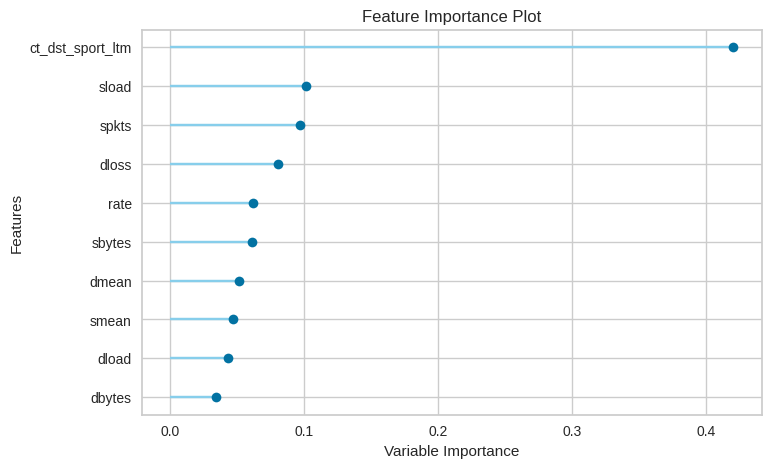

In [22]:
plot_model(best, plot = 'feature')


In [23]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9228,0.9241,0.9263,0.9330,0.9296,0.8441,0.8441
1,0.9223,0.9239,0.9263,0.9321,0.9292,0.8431,0.8431
2,0.9256,0.9283,0.9285,0.9358,0.9321,0.8497,0.8497
3,0.9217,0.9247,0.9263,0.9312,0.9287,0.8420,0.8420
4,0.9200,0.9242,0.9155,0.9377,0.9265,0.8388,0.8391
5,0.9271,0.9316,0.9253,0.9413,0.9332,0.8530,0.8532
6,0.9200,0.9232,0.9259,0.9286,0.9273,0.8384,0.8384
7,0.9210,0.9244,0.9218,0.9339,0.9278,0.8407,0.8408
8,0.9228,0.9270,0.9253,0.9338,0.9296,0.8441,0.8442


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

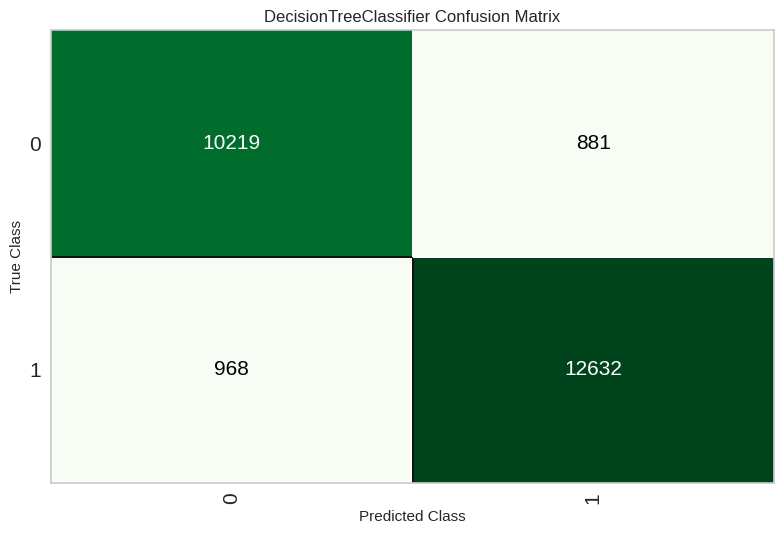

In [24]:
plot_model(dt, plot = 'confusion_matrix')

In [26]:
# model object
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

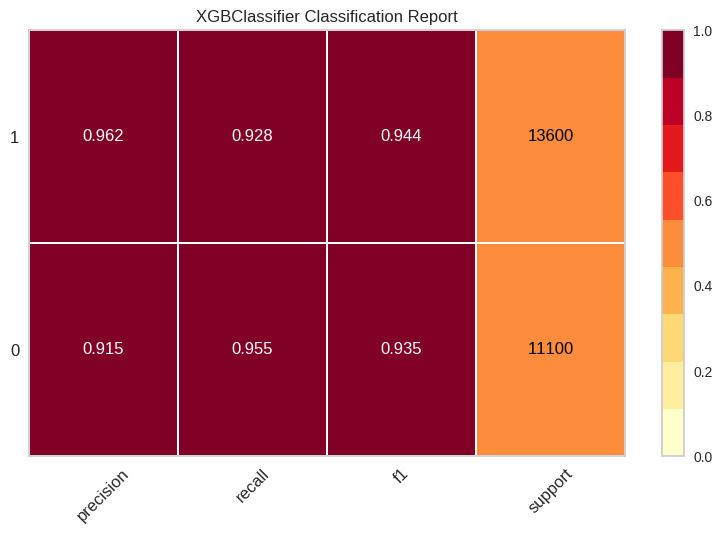

In [27]:
# plot class report
plot_model(best, plot = 'class_report')

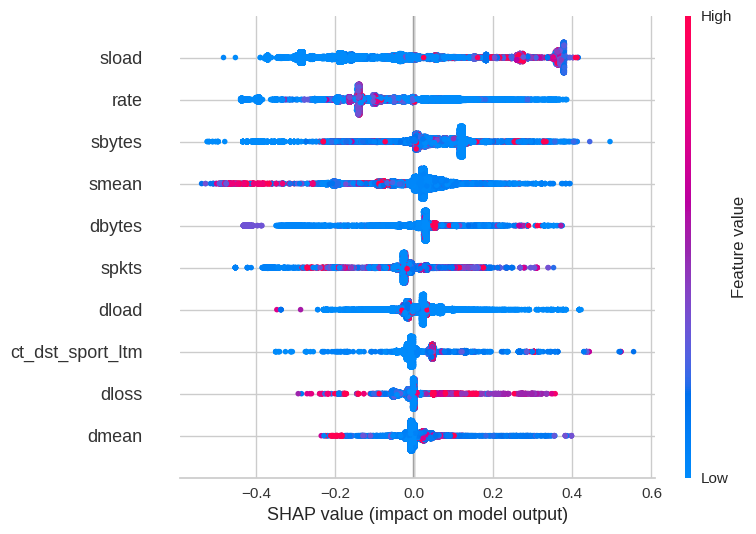

In [28]:
# interpret summary model
interpret_model(dt, plot = 'summary')

In [31]:
# save model
save_model(dt, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ct_dst_sport_ltm', 'dload',
                                              'spkts', 'sbytes', 'dloss',
                                              'dbytes', 'smean', 'sload',
                                              'dmean', 'rate'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_imput...
                                                      

In [32]:
# load model
loaded = load_model('my_first_model')
loaded

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ct_dst_sport_ltm', 'dload',
                                             'spkts', 'sbytes', 'dloss',
                                             'dbytes', 'smean', 'sload',
                                             'dmean', 'rate'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categorical_imput...
                                                              fill_v